# Import library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Import data

In [4]:
dataset = pd.read_csv('preprocessed_data.csv')

In [5]:
# Import ependent Variable
X = dataset.iloc[:, 0:22].values

In [6]:
# Import Dependent Variable
#y = dataset.iloc[0:100000, 29].values
y = dataset.iloc[0:, 23].values

# Split data and feature scaling

In [7]:
#Split data into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
#Applying PCA
start = time.time() 

from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

#execution time estimation
end = time.time()
print(end - start)

1.7390995025634766


# Fit Kernel SVM

In [9]:
#execution time estimation
start = time.time() 

# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear',probability=True, random_state = 0)
classifier.fit(X_train, y_train)

#execution time estimation
end = time.time()
print(end - start)

990.6106595993042


In [10]:
#Saving model
from sklearn.externals import joblib
filename = 'svm_model.sav'
joblib.dump(classifier, filename)

['svm_model.sav']

In [19]:
# Applying k-Fold Cross Validation

#execution time estimation
start = time.time()

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
mean = accuracies.mean()
#accuracies.std()

#execution time estimation
end = time.time()
print (mean)
print(end - start)

1693.5304052829742


In [ ]:
# Applying Grid Search to find the best model and the best parameters

#execution time estimation
start = time.time()

from sklearn.model_selection import GridSearchCV
parameters = [{'C': [10, 100, 1000], 'kernel': ['linear']},
              {'C': [10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
best_parameters

#execution time estimation
end = time.time()
print(end - start)

# Perdict test set and evaluate the model

In [11]:
# load the model from disk
loaded_model = joblib.load(filename)

# Predicting the Test set results
y_pred = loaded_model.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

#save CM into csv file
np.savetxt("cm.csv", cm, delimiter=",")

Confusion matrix, without normalization
[[1999   17   16   64    0   94    0    6   64  204]
 [  34 1532    0    0    0    0    0    9    0  375]
 [  48    1  411  227    0    6    0    0    0  537]
 [  73    0  111 7771    0  434    0    0   23   28]
 [ 257    5    0    7    0   13    0    1    4   76]
 [ 146    0   12  751    0 1776    0    0  121   18]
 [   5  417    0    0    0    0    0    1    0  138]
 [  15   34    0    0    0    0    0   32    0   25]
 [ 173    0    4  487    0 1044    0    0  362   14]
 [ 181  204  205   47    0    2    0    6    1 3162]]


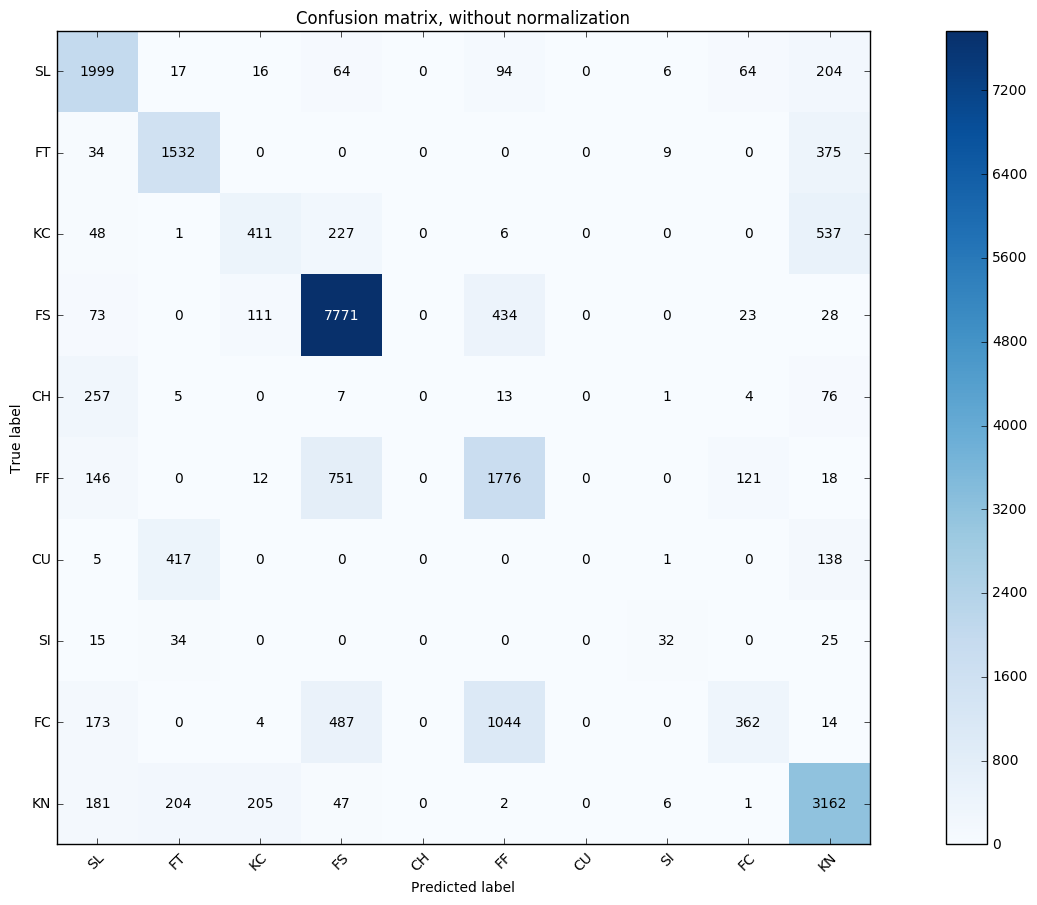

In [13]:
# Plot non-normalized confusion matrix
class_names = dataset['pitch_type'].unique()
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.show()

In [14]:
#evaluate test result accuracy and so on
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print ("accuracy:",accuracy)

accuracy: 0.715274863617


In [21]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred)
print (class_report)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

          CH       0.68      0.81      0.74      2464
          CU       0.69      0.79      0.74      1950
          FC       0.54      0.33      0.41      1230
          FF       0.83      0.92      0.87      8440
          FS       0.00      0.00      0.00       363
          FT       0.53      0.63      0.57      2824
          KC       0.00      0.00      0.00       561
          KN       0.58      0.30      0.40       106
          SI       0.63      0.17      0.27      2084
          SL       0.69      0.83      0.75      3808

   micro avg       0.72      0.72      0.72     23830
   macro avg       0.52      0.48      0.48     23830
weighted avg       0.68      0.72      0.68     23830



# Modules

In [12]:
#Visualize CM
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.set_size_inches(19.5, 10.5) #set figure size
    return ax